# NLP PROJECT : IMDB SENTIMENT ANALYSIS

## Introduction 

The dataset that we are about to explore is called "IMDB Movie Reviews Dataset"; it is a supervised machine learning dataset that contains various movie reviews and it has a sentiment column which denotes whether the moview review is positive or negative.
Our goal is to predict based on reviews from random person whether the review is positive or negative. 
For this project we will only be using basic classification models and some classification boosting techniques.

One can enlongate this project by adding other NLP algorithms / pretrained NLP models.

# Importing Libraries

In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# Importing DataSet

In [275]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Basic Checks

In [276]:
df.shape

(50000, 2)

In [277]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Exploratory Data Analysis

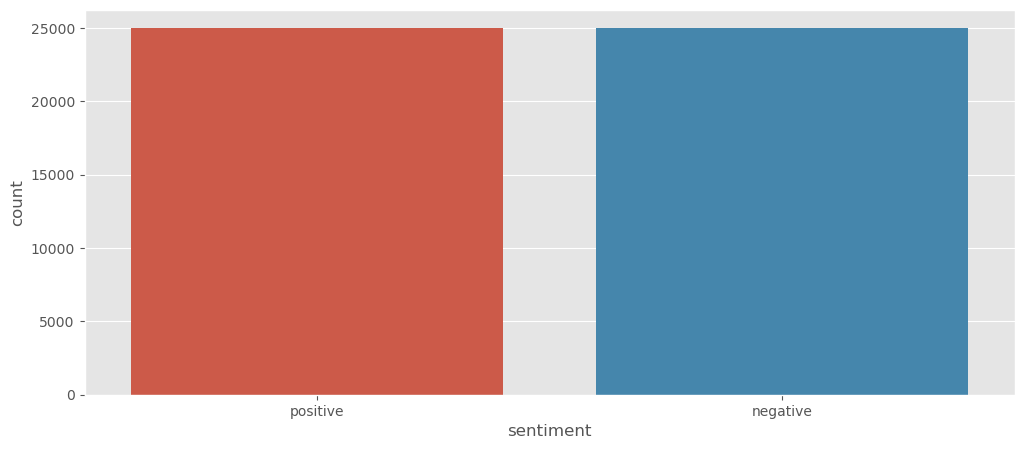

In [278]:
plt.figure(figsize = (12,5))
sns.countplot(data =df,x = 'sentiment');

In [279]:
positive_review=list(df[df["sentiment"] == "positive"]["review"])
negative_review=list(df[df["sentiment"] == "negative"]["review"])

In [280]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt 

In [281]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

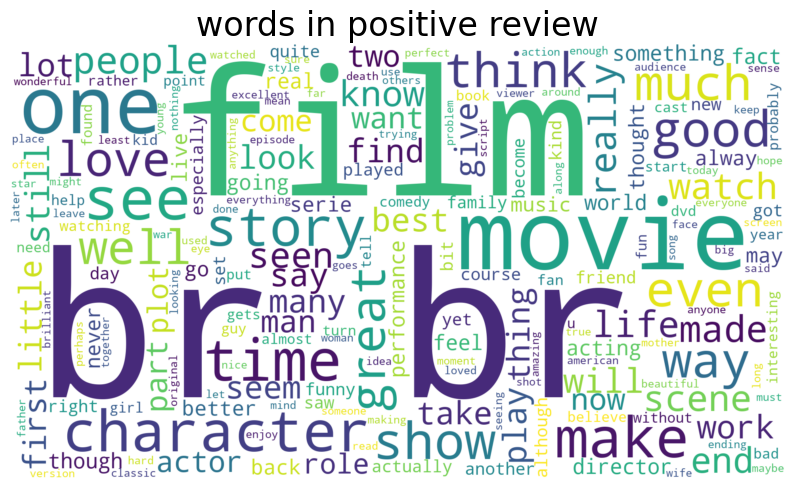

In [282]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

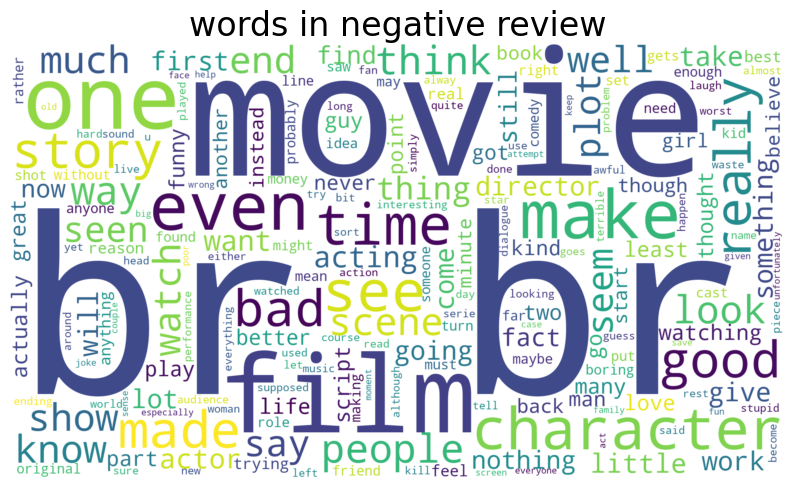

In [283]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

# Data Preprocessing

In [284]:
def text_processing(data,review):
    digit = '1234567890'
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data[review].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = sentance.lower()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords )
        preprocessed_reviews.append(sentance.strip())
    
    new_preprocessed_reviews=[]
    for sentennce in preprocessed_reviews:
        for char in sentennce:
            if char in digit:
                sentennce = sentennce.replace(char,'')
        new_preprocessed_reviews.append(sentennce)
    # removing punctuations   
    import string
    translator = str.maketrans('', '', string.punctuation)
    new_preprocessed_reviews = [sentence.translate(translator) for sentence in new_preprocessed_reviews]
                
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in new_preprocessed_reviews:
      list1=[]
      for words in sentence.split():
            list1.append(porter.stem(words))

      list2.append(' '.join(list1))
    return(list2)


In [285]:
df['cleaned_review']=text_processing(df,'review')

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:17<00:00, 2788.24it/s]


In [286]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hook r...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [287]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [288]:
df['cleaned_review'][1]

'wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat too truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard which rather use tradit wouldream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

In [289]:
positive_review=list(df[df["sentiment"] == "positive"]["cleaned_review"])
negative_review=list(df[df["sentiment"] == "negative"]["cleaned_review"])

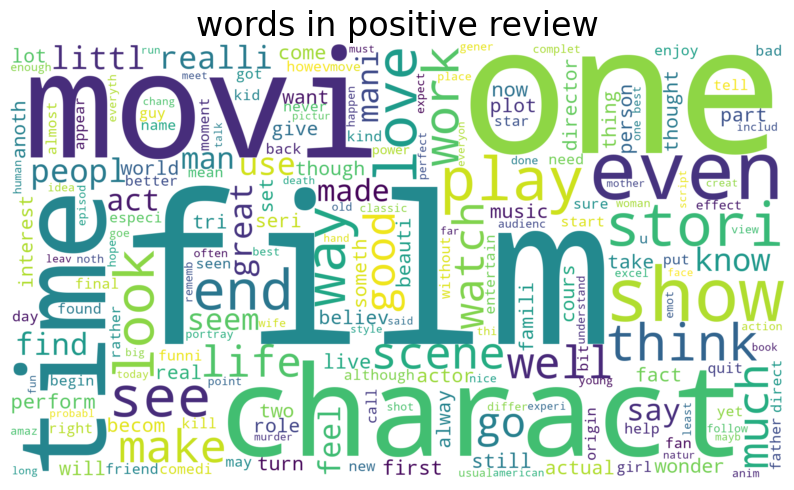

In [290]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

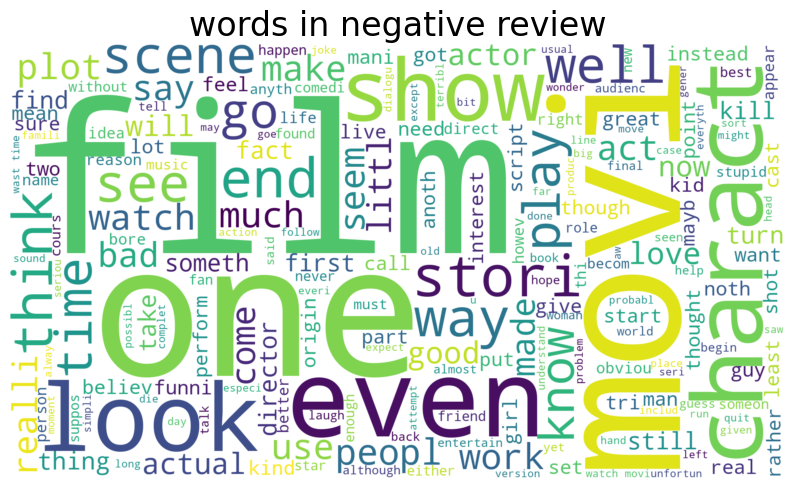

In [291]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

#### Most Common Words

In [292]:
pos_words = df[df["sentiment"] == "positive"]
neg_words = df[df["sentiment"] == "negative"]

In [293]:
pos_words

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hook r...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...
5,"Probably my all-time favorite movie, a story o...",positive,probabl alltim favorit movi stori selfless sac...
...,...,...,...
49983,"I loved it, having been a fan of the original ...",positive,love it fan origin seri alway wonder back stor...
49985,Imaginary Heroes is clearly the best film of t...,positive,imaginari hero clearli best film year complet ...
49989,I got this one a few weeks ago and love it! It...,positive,got one week ago love it modern light fill tru...
49992,John Garfield plays a Marine who is blinded by...,positive,john garfield play marin blind grenad fight gu...


In [294]:
from collections import Counter

count = Counter()

for text in pos_words['cleaned_review'].values:
    for word in text.split():
        count[word] += 1

count.most_common(15)




[('film', 49033),
 ('movi', 43133),
 ('one', 26963),
 ('time', 15475),
 ('see', 14682),
 ('good', 14576),
 ('will', 14477),
 ('stori', 13650),
 ('charact', 13632),
 ('make', 13159),
 ('great', 12804),
 ('watch', 12504),
 ('love', 12072),
 ('well', 11221),
 ('show', 10820)]

In [295]:
df_pos = pd.DataFrame(count.most_common(15),columns =['Word','No. of Occurances'])

In [296]:
df_pos.head()

,Word,No. of Occurances
0,film,49033
1,movi,43133
2,one,26963
3,time,15475
4,see,14682


<AxesSubplot:xlabel='No. of Occurances', ylabel='Word'>

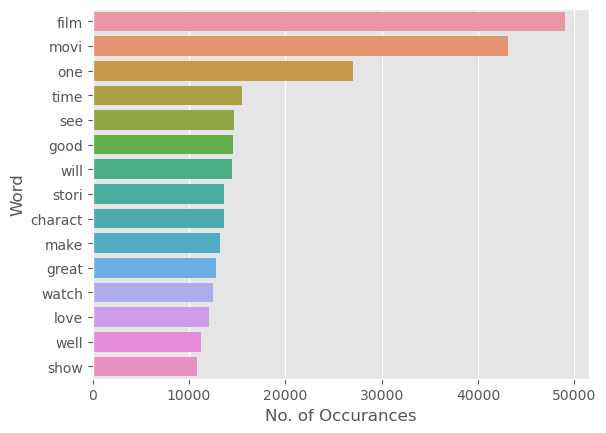

In [297]:
sns.barplot(data=df_pos, y='Word', x='No. of Occurances')

In [298]:
from collections import Counter

count = Counter()

for text in neg_words['cleaned_review'].values:
    for word in text.split():
        count[word] += 1

count.most_common(15)



[('movi', 55868),
 ('film', 43081),
 ('one', 25711),
 ('make', 15398),
 ('even', 15102),
 ('watch', 14582),
 ('time', 14347),
 ('good', 14346),
 ('bad', 14142),
 ('charact', 13948),
 ('see', 12892),
 ('will', 12315),
 ('realli', 12222),
 ('look', 11319),
 ('it', 11037)]

In [299]:
df_neg = pd.DataFrame(count.most_common(15),columns =['Word','No. of Occurances'])

In [300]:
df_neg.head()

,Word,No. of Occurances
0,movi,55868
1,film,43081
2,one,25711
3,make,15398
4,even,15102


<AxesSubplot:xlabel='No. of Occurances', ylabel='Word'>

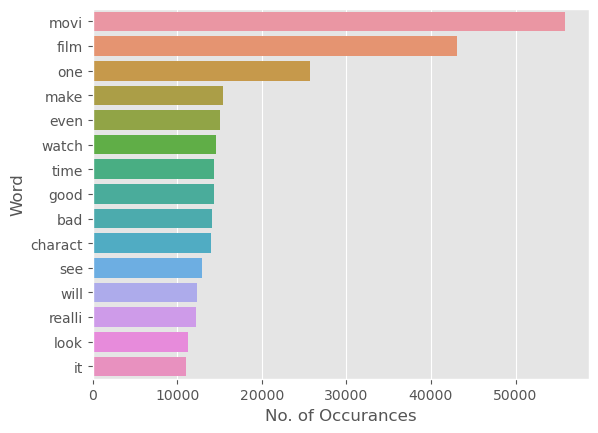

In [301]:
sns.barplot(data=df_neg, y='Word', x='No. of Occurances')

#### Removing Duplicated reviews

In [302]:
df.duplicated().sum()

418

In [303]:
df = df.drop_duplicates()

In [304]:
df.shape

(49582, 3)

# Feature Engineering

In [305]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hook r...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [306]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [307]:
X=df['cleaned_review']
y = df['sentiment']

In [308]:
from sklearn.model_selection import train_test_split

# Splitting the data

In [309]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [310]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39665,)
(39665,)
(9917,)
(9917,)


In [311]:
X_train

7837     realli like movi the empor new groov watch com...
4814     decid watch movi note scariest movi so expect ...
35458    hard say go ladi shanghai film without studio ...
3446     scifi adventur best mean worst agre statement ...
24478    around late is anim don bluth frustrat output ...
                               ...                        
11304    dictat thin experi of life industri cash sofia...
45059    classic case someth never been gloria now sing...
38405    spoiler spoilersi saw movi last night screen s...
860      product quit surpris me absolut love obscur ea...
15838    real eye candi world made float island fli anc...
Name: cleaned_review, Length: 39665, dtype: object

# Bag of Words

In [312]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect =CountVectorizer(max_features=10000)
count_vect.fit(X_train)
print("some feature names: ", count_vect.get_feature_names_out()[:30])
print("="*50)

some feature names:  ['aamir' 'aaron' 'abandon' 'abbey' 'abbi' 'abbot' 'abbott' 'abc' 'abduct'
 'abe' 'abid' 'abigail' 'abil' 'abl' 'abli' 'aboard' 'abomin' 'aborigin'
 'abort' 'abound' 'about' 'aboutth' 'abov' 'abraham' 'abroad' 'abrupt'
 'abruptli' 'absenc' 'absent' 'absolut']


In [313]:
X_train = count_vect.transform(X_train)

In [314]:
X_train.shape

(39665, 10000)

In [315]:
X_test = count_vect.transform(X_test)

# Prediction with Basic ML Models

In [316]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Define the models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('KNN', KNeighborsClassifier())
]

# Create an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
# Evaluate each model 
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}, ignore_index=True)
# Print the evaluation metrics DataFrame
metrics_df['Mean'] = (metrics_df["Accuracy"] + metrics_df["Precision"] + metrics_df["Recall"] + metrics_df["F1-score"])/4
metrics_df.sort_values(by=['Mean'],ascending=False)


,Model,Accuracy,Precision,Recall,F1-score,Mean
0,Logistic Regression,0.867803,0.867856,0.867803,0.867794,0.867814
2,Random Forest,0.839468,0.839485,0.839468,0.839462,0.839471
3,Gradient Boosting,0.799536,0.803718,0.799536,0.798782,0.800393
1,Decision Tree,0.714127,0.714129,0.714127,0.714120,0.714126
4,KNN,0.635575,0.635625,0.635575,0.635566,0.635585


### Gausian Naive Bayes

In [317]:
from sklearn.naive_bayes import GaussianNB

Nb_model =GaussianNB()

Nb_model.fit(X_train.toarray(), y_train)

y_pred = Nb_model.predict(X_test.toarray())

In [318]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
Mean = (accuracy + precision + recall + f1)/4
metrics_df = metrics_df.append({'Model': 'GaussianNB', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1,'Mean':Mean}, ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1-score,Mean
0,Logistic Regression,0.867803,0.867856,0.867803,0.867794,0.867814
1,Decision Tree,0.714127,0.714129,0.714127,0.714120,0.714126
2,Random Forest,0.839468,0.839485,0.839468,0.839462,0.839471
3,Gradient Boosting,0.799536,0.803718,0.799536,0.798782,0.800393
4,KNN,0.635575,0.635625,0.635575,0.635566,0.635585
5,GaussianNB,0.705254,0.728241,0.705254,0.697942,0.709172


# Prediction with Boosting ML Models

In [319]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

In [320]:
xgb_cl

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [321]:
xgb_cl.fit(X_train, y_train)
y_pred = xgb_cl.predict(X_test)

In [322]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
Mean = (accuracy + precision + recall + f1)/4
metrics_df = metrics_df.append({'Model': 'XGBClassifier', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1,'Mean':Mean}, ignore_index=True)
metrics_df.sort_values(by=['Mean'],ascending=False)

,Model,Accuracy,Precision,Recall,F1-score,Mean
0,Logistic Regression,0.867803,0.867856,0.867803,0.867794,0.867814
6,XGBClassifier,0.848039,0.849095,0.848039,0.847903,0.848269
2,Random Forest,0.839468,0.839485,0.839468,0.839462,0.839471
3,Gradient Boosting,0.799536,0.803718,0.799536,0.798782,0.800393
1,Decision Tree,0.714127,0.714129,0.714127,0.714120,0.714126
5,GaussianNB,0.705254,0.728241,0.705254,0.697942,0.709172
4,KNN,0.635575,0.635625,0.635575,0.635566,0.635585


## Grid Search with best Classification Models

### Logistic Regression	

In [323]:
logreg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

logreg = LogisticRegression()

# Define the grid search for logistic regression
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5)

# Fit the grid search model and test it
logreg_grid.fit(X_train, y_train)
y_pred = logreg_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Best Parameters: {logreg_grid.best_params_}")

Accuracy: 0.88
Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [324]:
from sklearn.metrics import plot_confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4939
           1       0.87      0.89      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



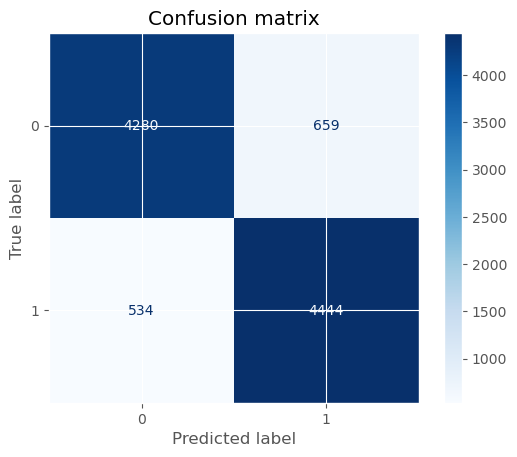

In [325]:
cm = confusion_matrix(y_test, y_pred)
disp = plot_confusion_matrix(logreg_grid, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix")
plt.show()

#### We can conclude that our best model for predicting reviews is Logistic Regression Model based on the model comparision report.

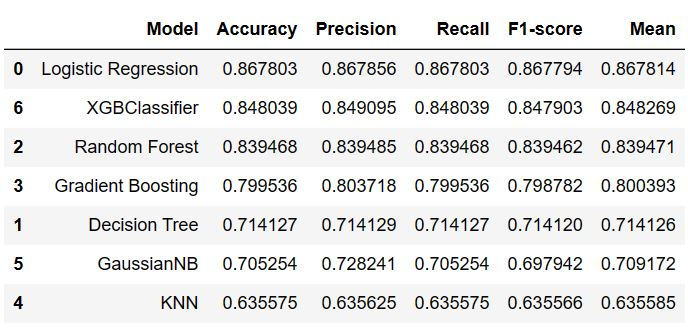

## Testing Our Best Model on a random review from our dataset

In [346]:
random_sample_df = df.sample(1)

In [348]:
random_sample_df

,review,sentiment,cleaned_review
20023,if you are like me then you will love this gre...,1,will love great come age teen moviei think mis...


In [349]:
trans_rand_rev = count_vect.transform(random_sample_df['cleaned_review'])

In [350]:
if logreg_grid.predict(trans_rand_rev)[0] == 1:
    pred_sentiment = 'positive'
else:
    pred_sentiment = 'negative'

In [351]:
if random_sample_df["sentiment"].values[0] == 1:
    actual_sentiment = 'positive'
else:
    actual_sentiment = 'negative'

In [352]:
print(f"For the random sample our model is predicting {pred_sentiment} sentiment, and the actual sentiment is {actual_sentiment}.")

For the random sample our model is predicting positive sentiment, and the actual sentiment is positive.
